In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

plt.style.use("dark_background")
print("voila!")

voila!


In [44]:
def intake(predicted, actual):
    plt.close('all')
    start = np.c_[predicted, actual].min()
    stop = np.c_[predicted, actual].max()
    line = np.arange(start, stop + 1)
    
    plt.scatter(predicted, actual, marker='.')
    plt.plot(line, line)
    plt.show()

def encode_col(colums, names):
    return np.where(names == colums)[0][0]

def decode_col(columns, names):
    return names[columns]

def models_fit(model, independents, dependents):
    w = model.coef_
    b = model.intercept_
    start = independents.min()
    stop = independents.max()
    x_range = np.linspace(start, stop)
    
    plt.plot(x_range, w * x_range + b)
    plt.scatter(independents, dependents, marker='x')
    

In [3]:
INCLUDE_COLUMNS = ['Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']

df = (
    pd.read_csv(
    r"../sample csv data/vgsales.csv",
    usecols=INCLUDE_COLUMNS
    )
    .dropna()
    .drop_duplicates()
)

PLATFORM = df['Platform'].unique()
GENRE = df['Genre'].unique()
PUBLISHER = df['Publisher'].unique()

df['Platform'] = df['Platform'].apply( encode_col, args=(PLATFORM,) )
df['Genre'] = df['Genre'].apply( encode_col, args=(GENRE,) )
df['Publisher'] = df['Publisher'].apply( encode_col, args=(PUBLISHER,) )

In [7]:
X = df.loc[:, ['Genre']]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

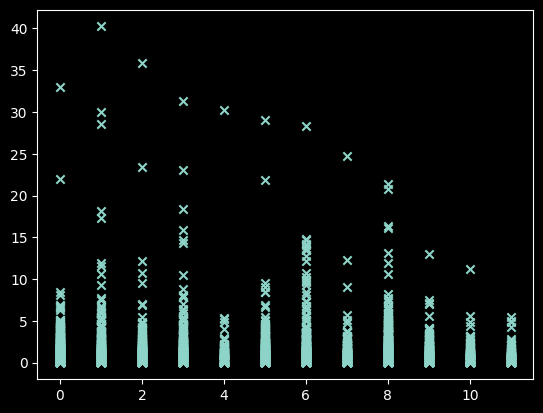

In [20]:
plt.scatter(X_train, y_train, marker='x')

In [36]:
GENRE

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

0.0036245996945126757


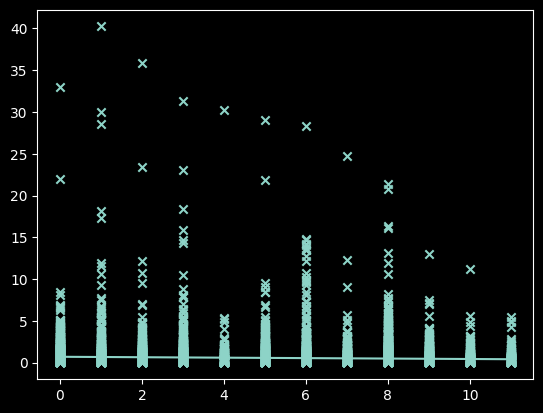

In [46]:
models_fit(model, X_train, y_train)

In [56]:
df[['Genre', 'Global_Sales']].head(10).to_clipboard()